# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: Johnny Gomes
        e o Nomeriano Neto

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
covid = pd.read_csv("./data/begin_covid.csv")
covid.tail(3)

,regiao,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
101,Brasil,76,43988,23,210147125,672846,27075,35930,904,277149.0,359767.0
102,Brasil,76,43989,24,210147125,691758,18912,36455,525,283952.0,371351.0
103,Brasil,76,43990,24,210147125,707412,15654,37134,679,290040.0,380238.0


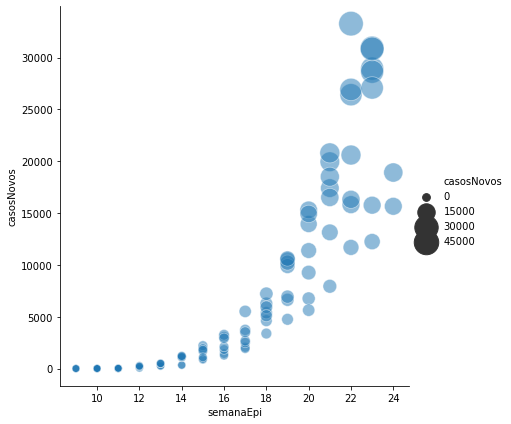

In [4]:
# grafico do crescimento de novos casos ao longos das semanas
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosNovos', palette="muted",
            height=6, data=covid)

### Entendimento dos dados a partir de graficos e outros indicadores 

In [5]:
from bokeh.plotting import figure, output_file, show

In [6]:
# lê info regionais - divididos por estados, inclusive
df = pd.read_csv("./data/covid_regioes.csv")
df.head(3)

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Norte,RO,11,20/03/20,12,1,1,0,0
1,Norte,RO,11,21/03/20,12,1,0,0,0
2,Norte,RO,11,22/03/20,13,3,2,0,0


In [7]:
# separacao visual dos dados em relacao ao atributo 'regiao'
#casos_Norte = df.loc[df2.regiao == 'Norte']

# posteriormente esses slices podem ser feitos em relacao aos estados
casos_TO = df.loc[(df.regiao == 'Norte') & (df.estado == 'TO')]
casos_AM = df.loc[(df.regiao == 'Norte') & (df.estado == 'AM')]

In [ ]:
# 1 - pegar total de casos de cada estado dinamicamente:


In [8]:
# 2 - criar grafo com regioes:
G = nx.Graph()
G.add_edges_from(
    [('Norte', 'Nordeste'), ('Norte', 'Centro-Oeste'), ('Nordeste', 'Centro-Oeste'), ('Nordeste', 'Sudeste'),
     ('Centro-Oeste', 'Sudeste'),('Centro-Oeste', 'Sul'), ('Sudeste', 'Sul')])

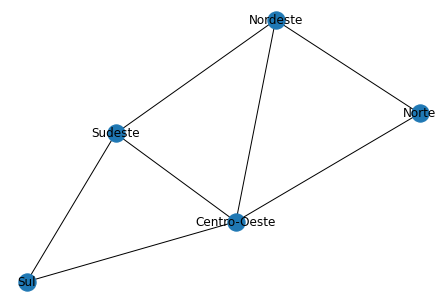

In [9]:
# 2.0.1 - vê a estrutura do grafo:
nx.draw(G, with_labels=True)

In [12]:
# 2.2 - adiciona os vertices (estados) as regioes:
G.add_edges_from(
    [('TO', 'Norte'), ('PA', 'Norte'), ('AM', 'Norte'), ('AC', 'Norte'),
     ('AP', 'Norte'),('RO', 'Norte'), ('RR', 'Norte')])

# nao precisa adicionar os nos separadamente, pode-se fazer isso de uma vez só.
# aqui esta separado apenas para melhor visualizacao das informacoes
G.add_edges_from(
    [('RS', 'Sul'), ('PR', 'Sul'), ('SC', 'Sul')])

# falta adicionar os estados das regioes Nordeste, Centro-Oeste e Sudeste.

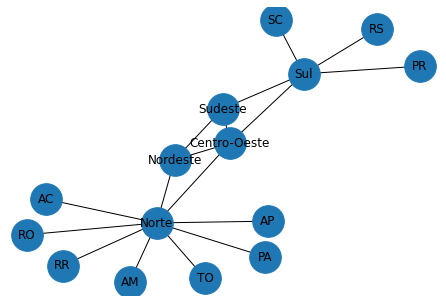

In [13]:
# 2.2.1 - ver a estrutura do grafo:
nx.draw(G, node_size=1000, with_labels=True)

In [ ]:
# 3 - atribuir numero de casos/mortes a cada nó-estado:


In [ ]:
# 4 - somar valores dos nós-estado e atribuir a sua regiao específica:


In [ ]:
# 5 - O diametro do nó é relativo ao numero de casos (usar interpolador entre o menor e maior numero):


In [ ]:
# 6 - animar o grafo e adicionar 'hover' com informacoes de numero de casos/mortes e/ou outras:


In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'TO')
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosAcumulado', palette="muted",
            height=6, data=casos_TO)

In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'AM')
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosNovos', palette="muted",
            height=6, data=casos_AM)

In [ ]:
# pega total de casos acumulados no Tocantins:
casos_TO.casosAcumulado[-1:]

In [ ]:
casos_TO.data

### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

Estudamos sobre Covid-19 e sobre a propagacao do virus pelo mundo

### 2. Criação da base de dados de interesse:

A base de dados foi criada por orgao federal e disponibilizada em:
[Saúde.Gov](https://covid.saude.gov.br/) mais informacoes em [SUS Analítico](https://susanalitico.saude.gov.br/)

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

Dividimos a base original em tres arquivos contendo: 
    1. Dados gerais do pais;
    2. Dados regionais;
    3. Dados estaduais e municipais;
    
Algumas colunas se fizeram desnecessarias, como o numero de habitantes em cada uma dessas microregioes por isso, foram descartadas da base em que trabalhamos.

#### 3.b) Integração dos dados:

Nao houve integracao de dados novos ou externos à base já existente.

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: